The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

Used GPU/TPU for training this algorithm because NCHW(channel first) is not supported on general CPU


#  Importing Libraries 


In [ ]:
import numpy as np
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import mnist
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras import regularizers
import tensorflow as tf

#### NHWC to NCHW -> changing channel settings for keras



In [ ]:
#K.set_image_data_format("channels_first")
np.random.seed(0)

In [ ]:
channels =1
height = 28
width =28


# Loading Dataset

In [ ]:
(data_train,target_train), (data_test, target_test)= mnist.load_data()
print(data_train.shape)
print(target_train.shape)
print(data_test.shape)
print(target_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Exploring dataset and Pre processing

*   Changing shapes
*   Transformation
*   Converting output to categorical(one hot encoding) 






In [ ]:
data_train.shape

(60000, 28, 28)

In [ ]:
data_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
data_train = data_train.reshape(data_train.shape[0], height, width, channels)

In [ ]:
data_train.shape

(60000, 28, 28, 1)

In [ ]:
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

print(data_test[0].shape)


(28, 28, 1)


In [ ]:
feature_train = data_train /255
feature_test = data_test /255

print(feature_test)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [ ]:
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)

In [ ]:
number_of_classes = target_test.shape[1]
print(number_of_classes)

10


# Sequential CNN

In [ ]:
network = Sequential()

In [ ]:
## layer1
network.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(width,height,channels), activation ='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.5))

network.add(Flatten())

##layer2
network.add(Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
network.add(Dropout(0.3))

##layer3
network.add(Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
network.add(Dropout(0.3))

## output layer
network.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
## opt = tf.keras.optimizers.RMSprop(learning_rate=0.5)
network.compile(loss="categorical_crossentropy",
                optimizer='rmsprop',
                metrics = ["accuracy"])

In [ ]:
history = network.fit(feature_train,
                      target_train,
                epochs =20,
                verbose=1,
                batch_size=100,
                validation_data= (feature_test, target_test))

Epoch 1/20
600/600 [==============================] - 17s 6ms/step - loss: 1.0021 - accuracy: 0.8738 - val_loss: 0.5030 - val_accuracy: 0.9413
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.5112 - accuracy: 0.9322 - val_loss: 0.3688 - val_accuracy: 0.9693
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.4533 - accuracy: 0.9393 - val_loss: 0.3232 - val_accuracy: 0.9729
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.4248 - accuracy: 0.9438 - val_loss: 0.3250 - val_accuracy: 0.9714
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.4069 - accuracy: 0.9464 - val_loss: 0.3228 - val_accuracy: 0.9692
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3936 - accuracy: 0.9477 - val_loss: 0.3262 - val_accuracy: 0.9669
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3810 - accuracy: 0.9502 - val_loss: 0.2971 - val_accuracy: 0.9732
Epoch

In [ ]:
# get training and testing loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

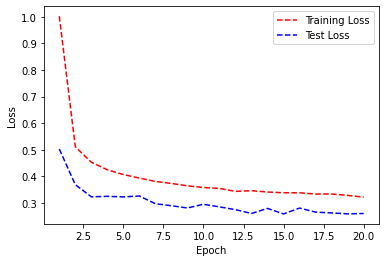

In [ ]:
# visualise loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

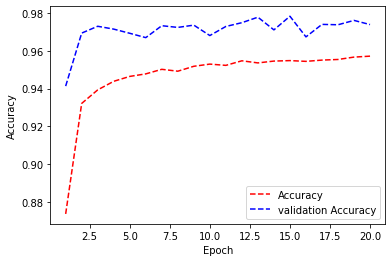

In [ ]:
training_accuracy= history.history["accuracy"]
testing_accuracy= history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, testing_accuracy, "b--")
plt.legend(["Accuracy", "validation Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Importing more Libraries for accuracy scores 

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
predict_x=network.predict(feature_test) 
classes_x=np.argmax(predict_x,axis=1)
target = np.argmax(target_test, axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(f"Number of correct labels predicted : {(target == classes_x).sum()} out of {data_test.shape[0]}")

Number of correct labels predicted : 9738 out of 10000


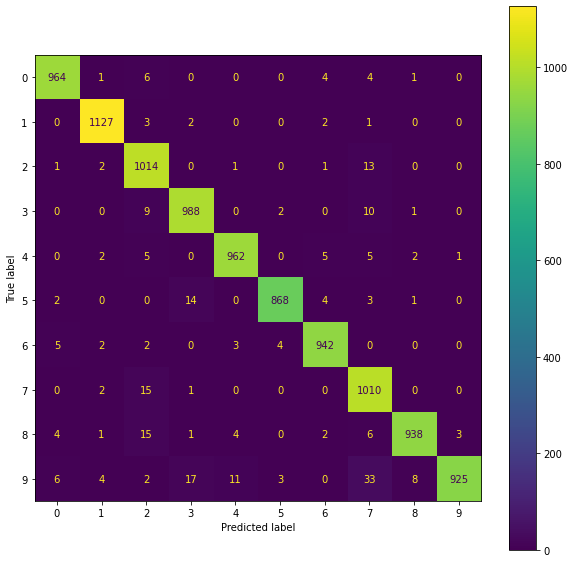

In [ ]:
cm = confusion_matrix(target,classes_x)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)

In [ ]:
print(classification_report(target, classes_x))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.96      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.93      0.98      0.96      1028
           8       0.99      0.96      0.97       974
           9       1.00      0.92      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
accuracy = accuracy_score(target, classes_x)
precision = precision_score(target, classes_x,average='weighted')
recall = recall_score(target, classes_x,average='macro')
f1 = f1_score(target, classes_x,average='micro')
print(f"Precision : {precision}")
print(f"Accuracy : {accuracy}")
print(f"Recall : {recall}")
print(f"F1 Accuracy : {f1}")

Precision : 0.9743776108060611
Accuracy : 0.9738
Recall : 0.9735705626239801
F1 Accuracy : 0.9738


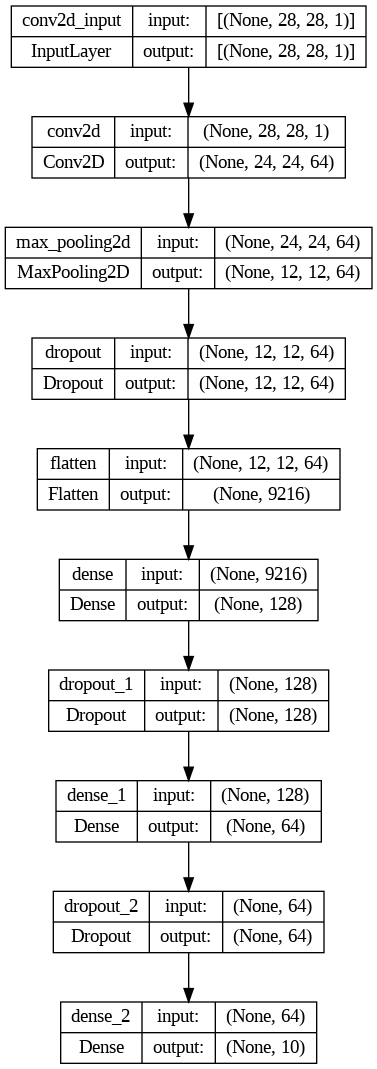

In [ ]:
tf.keras.utils.plot_model(network, show_shapes=True)

#### Pickle Out the model

In [ ]:
import pickle
pickle_out = open("mnist_model.pkl", "wb")
pickle.dump(history, pickle_out)
pickle_out.close()

### Saving the Model 

In [ ]:
# Saving the model for Future Inferences

network.save("model.h5")

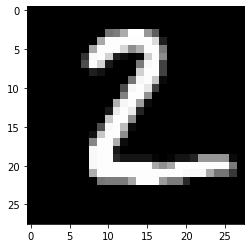

In [ ]:
fig = plt.figure
plt.imshow(feature_test[1], cmap='gray')
plt.show()

In [ ]:
classes_x[1]
